### A Simple MA model looks like 
### $r_{t}$ = c + $\theta_{t-1}*\epsilon_{t-1}$ +$\epsilon_{t}$
### $r_{t}$  = represents the value of r in the current period
###  $\theta_{t-1}$ = is a numeric coeff for the value associated with the first lag
###  $\epsilon_{t-1}$ = is the residual for the past period
###  $\epsilon_{t}$ = is the residual for the current period

## A simple MA(1) is th same as an AR($\infty$) with certain restrictions

### The difference between AR and MA model is that in the AR model we have 
###  $x_{t}$ = $\varphi *x_{t-1}$ +  $C$ + $\epsilon_{t}$
### In MA model we have :
### $x_{t}$ = c + $\theta_{t-1}*\epsilon_{t-1}$ +$\epsilon_{t}$

### Here we see that other than the constant C and eplsilon at t the only difference between the 2 models is AR considers the variable at t-1 whereas MA model considers the residual epsilon at period t-1

### In the AR model we relied on the PACF values but in the MA model we will rely on the ACF values

### This is because the MA model does not depend on past values of the variable hence determing which lagged values have a significant direct effect on the present day ones is not relevant.

## How is the MA model different from the AR model?

## The MA model includes past residuals while the AR model includes the past values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from math import sqrt
sns.set()

In [9]:
raw_csv_data= pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp['date']= pd.to_datetime(df_comp['date'],dayfirst=True)
df_comp.set_index('date',inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [10]:
df_comp['market_value']=df_comp['ftse']

In [11]:
del df_comp['spx']; del df_comp['dax']; del df_comp['ftse']; del df_comp['nikkei']

In [12]:
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [13]:
size

5021

In [14]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [15]:
df['returns'] = df.market_value.pct_change(1)*100 

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


In [16]:
df['returns'][1:]

date
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
1994-01-14    1.206842
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5020, dtype: float64

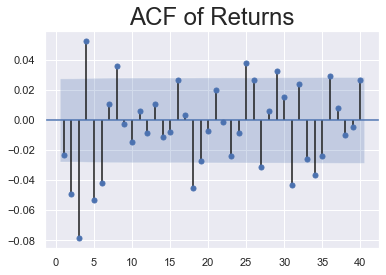

In [17]:
sgt.plot_acf(df['returns'][1:],zero=False,lags=40)
plt.title("ACF of Returns", size=24)
plt.show()

In [18]:
model_ret_ma_1= ARMA(df['returns'][1:],order=(0,1))
results_ret_ma_1= model_ret_ma_1.fit()
results_ret_ma_1.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Fri, 11 Sep 2020   AIC                          15865.190
Time:                        19:54:49   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

### The [1:] above  uses all the values from the 'return' column after the first one
### We are simultaneously are keeping the entire data and also taking care of the no Nan values in the data requirement
### The order parameter has to be changed ARMA(order=(P ,Q)) 
### P represents AR components
### Q represents MA components

In [19]:
model_ret_ma_2= ARMA(df['returns'][1:],order=(0,2))
results_ret_ma_2= model_ret_ma_2.fit()
results_ret_ma_2.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Fri, 11 Sep 2020   AIC                          15853.728
Time:                        19:54:56   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     -3.669      0.000      -0.077      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1499           +0.0000j            4.1499            0.0000
MA.2           -4.8004           +0.0000j            4.8004            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
model_ret_ma_3= ARMA(df['returns'][1:],order=(0,3))
results_ret_ma_3= model_ret_ma_3.fit()
results_ret_ma_3.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Fri, 11 Sep 2020   AIC                          15818.634
Time:                        19:55:01   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     -4.134      0.000      -0.082      -0.029
ma.L3.returns    -0.0904      0.015     -6.121      0.000      -0.119      -0.061
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.0105           -0.0000j            2.0105           -0.0000
MA.2           -1.3129           -1.9441j            2.3459           -0.3445
MA.3           -1.3129           +1.9441j            2.3459            0.3445
-----------------------------------------------------------------------------
"""

In [21]:
model_ret_ma_4= ARMA(df['returns'][1:],order=(0,4))
results_ret_ma_4= model_ret_ma_4.fit()
results_ret_ma_4.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Fri, 11 Sep 2020   AIC                          15809.547
Time:                        19:55:06   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     -3.902      0.000      -0.083      -0.027
ma.L3.returns    -0.0922      0.015     -6.306      0.000      -0.121      -0.064
ma.L4.returns     0.0454      0.014      3.338      0.001       0.019       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2257           -1.4206j            1.8763           -0.3633
MA.2           -1.2257           +1.4206j            1.8763            0.3633
MA.3            2.2405           -1.1103j            2.5006           -0.0732
MA.4            2.2405           +1.1103j            2.5006            0.0732
-----------------------------------------------------------------------------
"""

In [22]:
model_ret_ma_5= ARMA(df['returns'][1:],order=(0,5))
results_ret_ma_5= model_ret_ma_5.fit()
results_ret_ma_5.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Fri, 11 Sep 2020   AIC                          15799.645
Time:                        19:55:11   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     -3.518      0.000      -0.077      -0.022
ma.L3.returns    -0.0852      0.015     -5.799      0.000      -0.114      -0.056
ma.L4.returns     0.0458      0.014      3.374      0.001       0.019       0.072
ma.L5.returns    -0.0500      0.014     -3.454      0.001      -0.078      -0.022
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.2127           -1.0805j            1.6242           -0.3842
MA.2           -1.2127           +1.0805j            1.6242            0.3842
MA.3            1.7305           -0.0000j            1.7305           -0.0000
MA.4            0.8062           -1.9326j            2.0940           -0.1871
MA.5            0.8062           +1.9326j            2.0940            0.1871
-----------------------------------------------------------------------------
"""

In [23]:
model_ret_ma_6= ARMA(df['returns'][1:],order=(0,6))
results_ret_ma_6= model_ret_ma_6.fit()
results_ret_ma_6.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 11 Sep 2020   AIC                          15794.442
Time:                        19:55:17   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [24]:
model_ret_ma_7= ARMA(df['returns'][1:],order=(0,7))
results_ret_ma_7= model_ret_ma_7.fit()
results_ret_ma_7.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Fri, 11 Sep 2020   AIC                          15796.091
Time:                        19:55:24   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     -3.454      0.001      -0.077      -0.021
ma.L3.returns    -0.0821      0.014     -5.789      0.000      -0.110      -0.054
ma.L4.returns     0.0458      0.014      3.360      0.001       0.019       0.073
ma.L5.returns    -0.0486      0.014     -3.381      0.001      -0.077      -0.020
ma.L6.returns    -0.0390      0.014     -2.702      0.007      -0.067      -0.011
ma.L7.returns     0.0085      0.014      0.592      0.554      -0.020       0.037
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9690           -1.1814j            1.5279           -0.3593
MA.2           -0.9690           +1.1814j            1.5279            0.3593
MA.3           -2.0397           -0.0000j            2.0397           -0.5000
MA.4            0.7516           -1.5246j            1.6998           -0.1771
MA.5            0.7516           +1.5246j            1.6998            0.1771
MA.6            1.5538           -0.0000j            1.5538           -0.0000
MA.7            5.5175           -0.0000j            5.5175           -0.0000
-----------------------------------------------------------------------------
"""

In [25]:
model_ret_ma_8= ARMA(df['returns'][1:],order=(0,8))
results_ret_ma_8= model_ret_ma_8.fit()
results_ret_ma_8.summary()

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Fri, 11 Sep 2020   AIC                          15791.205
Time:                        19:55:39   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.returns     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.returns    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.returns    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.returns     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.returns     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [26]:
LLR_test(model_ret_ma_1, model_ret_ma_2)

0.0

In [27]:
LLR_test(model_ret_ma_2, model_ret_ma_3)

0.0

In [28]:
LLR_test(model_ret_ma_2, model_ret_ma_4)

0.0

In [29]:
LLR_test(model_ret_ma_2, model_ret_ma_5)

0.0

In [30]:
LLR_test(model_ret_ma_2, model_ret_ma_6)

0.0

In [31]:
LLR_test(model_ret_ma_2, model_ret_ma_7)

0.0

In [32]:
LLR_test(model_ret_ma_2, model_ret_ma_8)

0.0